Data Collection
Download the daily closing price data for the S&P 500, FTSE 100, and Gold (SPDR) from
January 2015 to December 2018.

Installing Yahoo Finance package

In [3]:
%pip install yfinance
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gianm\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gianm\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Importing Yahoo Finanace

In [4]:
import yfinance as yf

Importing the closing price data for S&P 500, FTSE 100, and Gold (SPDR). Downloaded locally into csv's. \
Edited dataframes for legibility

In [5]:
snp = yf.download(tickers="^GSPC",start="2015-01-01" , end="2018-12-31")
snpClosing = snp['Close']
snpClosing = snpClosing.reset_index()
snpClosing['Date'] = snpClosing['Date'].dt.strftime('%Y-%m-%d')
snpClosing = snpClosing.rename(columns={'^GSPC': 'Price'})
snpClosing['Price'] = snpClosing['Price'].round(2)
snpClosing.set_index('Date', inplace=True)
snpClosing.to_csv("sp500_closing_price.csv")

ftse = yf.download(tickers="^FTSE",start="2015-01-01" , end="2018-12-31")
ftseClosing = ftse['Close']
ftseClosing = ftseClosing.reset_index()
ftseClosing['Date'] = ftseClosing['Date'].dt.strftime('%Y-%m-%d')
ftseClosing = ftseClosing.rename(columns={'^FTSE': 'Price'})
ftseClosing['Price'] = ftseClosing['Price'].round(2)
ftseClosing.set_index('Date', inplace=True)
ftseClosing.to_csv("ftse_closing_price.csv")

gld = yf.download(tickers="GLD",start="2015-01-01" , end="2018-12-31")
gldClosing = gld['Close']
gldClosing = gldClosing.reset_index()
gldClosing['Date'] = gldClosing['Date'].dt.strftime('%Y-%m-%d')
gldClosing = gldClosing.rename(columns={'GLD': 'Price'})
gldClosing['Price'] = gldClosing['Price'].round(2)
gldClosing.set_index('Date', inplace=True)
gldClosing.to_csv("spdrgold_closing_price.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stationarity Analysis: Plot the daily closing prices of each instrument. \
 Note: I could've imported the data from the csvs into new variables but that would be quite unoptomized

<Axes: title={'center': 'SPDR Gold Closing Prices'}, xlabel='Date'>

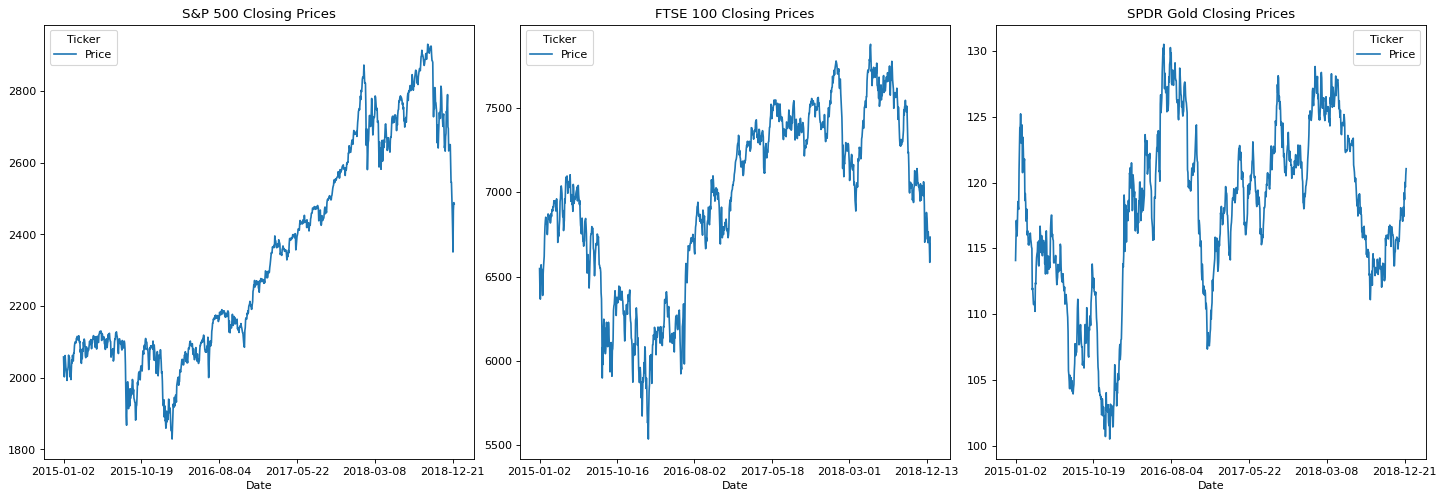

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=80)
plt.tight_layout()

snpClosing.plot(ax=axes[0], title="S&P 500 Closing Prices")
ftseClosing.plot(ax=axes[1], title="FTSE 100 Closing Prices")
gldClosing.plot(ax=axes[2], title="SPDR Gold Closing Prices")

Basic plots of the closing price data

Q:Based on the plots, assess whether the time series appears stationary. \
A:Visually the following assertions may be made about these plots: \
S&P 500: The mean of this plot is clearly rising. Taking chunks in different periods will result in different means, compare S&P 500 2015 - 2016 vs 2017 - 2018. It is also irregularly volatile comparing 2017-2018 vs 2018-2019. This long run of positive values is a clear indication of a non-stationary time series.\
FTSE: This plot seems to indicate both a gradual increase in mean as well as irregular periods of variance. \
SPDR: It is difficult to asses visually if the time series is stationary or not. There doesnt appear to be a mean trend, with the time series regularly fluctuating around 115. It appears to experience different levels of volatility but this cannot be asserted without calculations.

In [7]:
import pandas as pd
series = [("S&P 500",snpClosing),("FTSE 100",ftseClosing),("SPDR Gold",gldClosing)]
meanVarResult = pd.DataFrame({"Mean_Former":[],"Mean_Latter":[],"Variance_Former":[],"Variance_Latter":[]})

for plots in series:
    halfLength = len(plots[1].values) // 2
    window1 = plots[1].values[:halfLength]
    window2 = plots[1].values[halfLength:]

    entry = pd.DataFrame({"Mean_Former":[window1.mean().round(2)],"Mean_Latter":[window2.mean().round(2)],"Variance_Former":[window1.var().round(2)],"Variance_Latter":[window2.var().round(2)]})
    meanVarResult = pd.concat([entry,meanVarResult], ignore_index=True)

meanVarResult.index = ["SPDR Gold","FTSE 100","S&P 500"]
display(meanVarResult)

,Mean_Former,Mean_Latter,Variance_Former,Variance_Latter
SPDR Gold,115.28,119.90,56.13,18.94
FTSE 100,6531.14,7372.18,139505.01,52904.60
S&P 500,2077.20,2596.42,6822.52,33469.52


As may be noticed from these calculations there are noticeable mean shifts for FTSE 100 & S&P 500, meanwhile that of the	SPDR Gold is less pronounced. \
When it comes to variance, significant differences in variance are noticeable for all three plots

In [8]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gianm\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
from statsmodels.tsa.stattools import adfuller

print('\t\tp-value')
for plots in series:
    values = plots[1].values
    result = adfuller(values)
    # print('ADF Statistic: %f' % result[0])
    print( plots[0],"\t", result[1]  )
    # print('Critical Values:')
    # for key, value in result[4].items():
    #     print('\t%s: %.3f' % (key, value))


		p-value
S&P 500 	 0.6659769243253116
FTSE 100 	 0.4320506300783192
SPDR Gold 	 0.17660696387362435


As may be noticed from these P-Values all three p-values failed to reject the null hypothesis and therefore are non-stationary

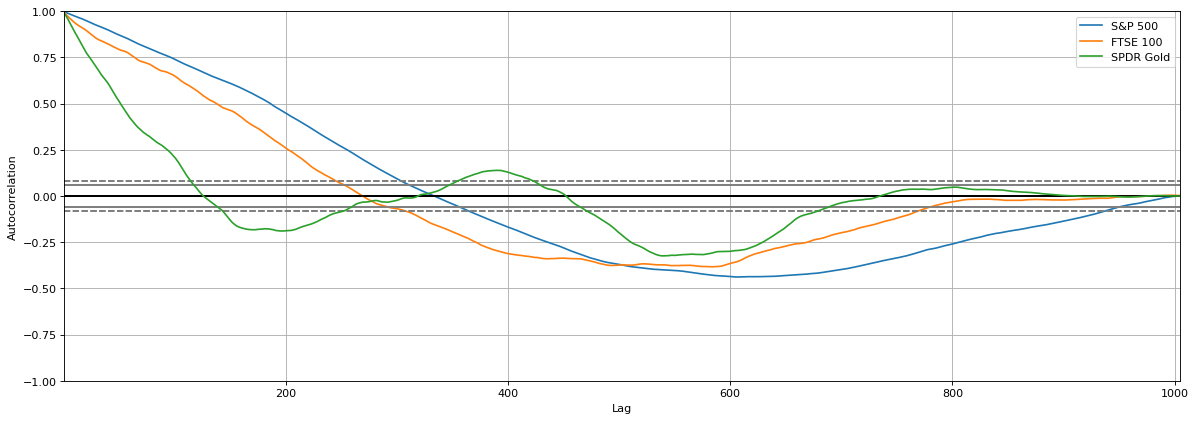

In [10]:
from pandas.plotting import autocorrelation_plot
fig, axes = plt.subplots(1, figsize=(18, 6), dpi=80)

index = 0
for plots in series:
    diff = list()
    for i in range(1,len(values)):
        diff.append(values[i] - values[i - 1])
    autocorrelation_plot(plots[1],label=plots[0])
    index+=1
    


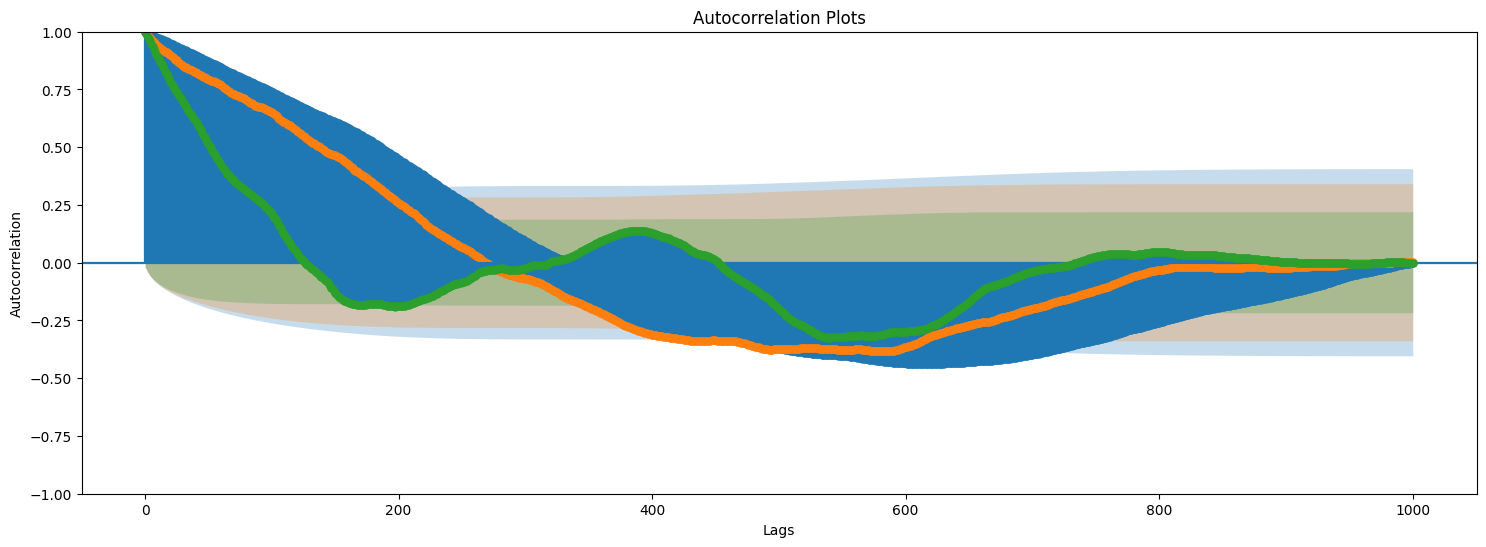

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(1,figsize=(18, 6))
for plots in series:
    plot_acf(plots[1], lags=1000, ax=ax, alpha=0.5,label=plots[0])

ax.set_title("Autocorrelation Plots")
ax.set_xlabel("Lags")
ax.set_ylabel("Autocorrelation")
plt.show()

Here we are using to functions from two different python packages to plot the autocorrelation to see if they form a random walk. We may notice that SPDR Gold shows the closest behaviour to that of a random walk, as its autocorrelation quickly diminishes and oscillates around zero. The other two have stronger autocorrelation, indicating less randomness and suggesting the presence of trends in price movements.

Todo: control chart , eye chart, runs test, standard deviation of the distance smaller than standard deviation of original series, root mean squared error statistc,point forcast


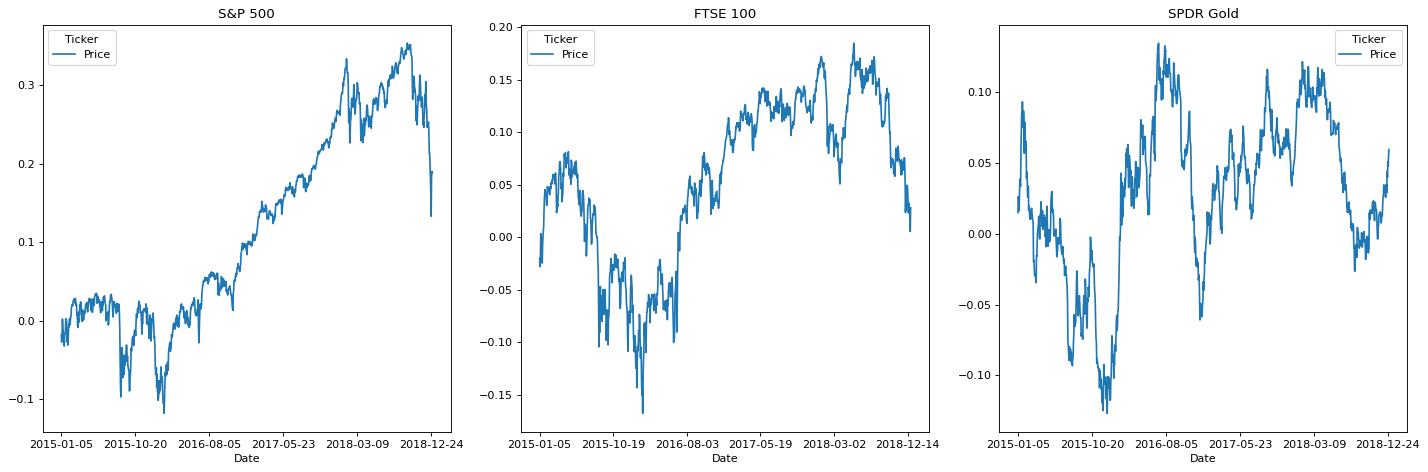

In [12]:
import numpy as np
fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=80)

for ax, plots in zip(axes, series):
    lrets = np.log(plots[1]/plots[1].shift(1)).dropna()
    lrets.cumsum().plot(ax=ax)
    ax.set_title(plots[0])  
    ax.set_xlabel("Date")

plt.tight_layout()  
plt.show()


Logarithmic returns (ln(v+1/v)) offer several advantages over arithmetic returns (v+1/v), particularly in financial analysis. One key advantage is time additivity, log returns over multiple periods can be summed to yield the total log return, this makes them more convenient for long-term analysis such as portfolio return calculations. While arithmetic returns can also be used for multi-period analysis, the process involves a more complex formula[1].

Additionally, prices are often assumed to follow a log-normal distribution, though this may not hold true for every price series. Transforming prices into log returns results in values that approximate a normal distribution, which is beneficial in contexts where normality is assumed. This property is particularly valuable in machine learning and statistical analyses, where normal distributions are commonly used.

While arithmetic returns are often more intuitive for comparing individual price changes, this advantage are limited as these returns tend to exhibit higher volatility compared to logarithmic returns. 

[1]Hudson, Robert S., and Andros Gregoriou. "Calculating and comparing security returns is harder than you think: A comparison between logarithmic and simple returns." International Review of Financial Analysis 38 (2015): 151-162.

In [20]:
from scipy.stats import kurtosis
from scipy.stats import skew

for plots in series:
    daily_logs =  np.log(plots[1]/plots[1].shift(1)).dropna()
    print(plots[0])
    print("Mean:",round(np.mean(daily_logs),6))
    print("Variance:",round(np.std(daily_logs).values[0],6))
    print("Skew:",skew(daily_logs))
    print("Kurtosis:",kurtosis(daily_logs),"\n")


S&P 500
Mean: 0.000188
Variance: 0.008619
Skew: [-0.49220948]
Kurtosis: [3.9124667] 

FTSE 100
Mean: 2.8e-05
Variance: 0.009004
Skew: [-0.17456981]
Kurtosis: [2.41406285] 

SPDR Gold
Mean: 5.9e-05
Variance: 0.008043
Skew: [0.23151388]
Kurtosis: [2.58073965] 



c:\Users\gianm\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\gianm\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\gianm\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes a

Annualization of Return and Volatility

In [25]:
for plots in series:
    daily_logs =  np.log(plots[1]/plots[1].shift(1)).dropna()
    first_moment = np.mean(daily_logs)
    second_moment = np.std(daily_logs).values[0]
    year_return = (first_moment * 252)
    year_vol = (second_moment * np.sqrt(252))
    print(plots[0])
    print("Annualized Return:",round(year_return*100,6),"%")
    print("Annualized Volatility:",round(year_vol*100,6),"%\n")

    

S&P 500
Annualized Return: 4.737263 %
Annualized Volatility: 13.682932 %

FTSE 100
Annualized Return: 0.70031 %
Annualized Volatility: 14.293772 %

SPDR Gold
Annualized Return: 1.490573 %
Annualized Volatility: 12.768227 %



c:\Users\gianm\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\gianm\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\gianm\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes a